# Source: https://github.com/sukritranjan/ranjanwordsworthsasselov2016/blob/bd5de2cb081b129bfd6b3b5bc173ca4e9ce7702b/extract_gas_cross_sections.py

This is used to generate the extinction cross sections (absorbtion + Rayleigh scattering) for each wavelength.

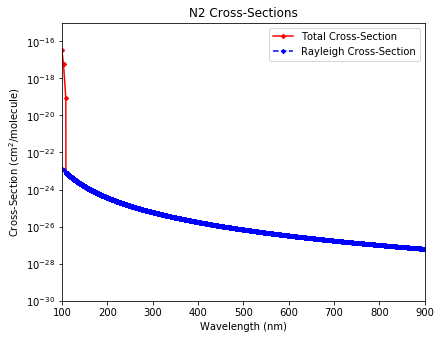

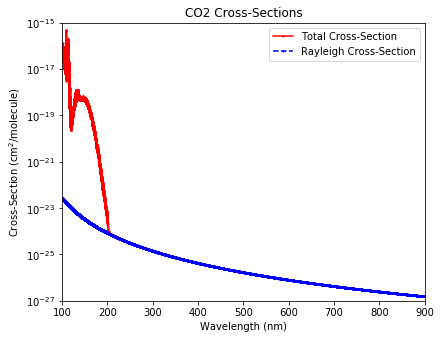

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:375: ConversionWarning: Some errors were detected !
    Line #78 (got 1 columns instead of 2)
    Line #88 (got 1 columns instead of 2)
    Line #97 (got 1 columns instead of 2)
    Line #102 (got 1 columns instead of 2)
    Line #129 (got 1 columns instead of 2)
    Line #468 (got 1 columns instead of 2)
    Line #509 (got 1 columns instead of 2)
    Line #523 (got 1 columns instead of 2)
    Line #527 (got 1 columns instead of 2)
    Line #532 (got 1 columns instead of 2)
    Line #538 (got 1 columns instead of 2)
    Line #539 (got 1 columns instead of 2)
    Line #541 (got 1 columns instead of 2)
    Line #544 (got 1 columns instead of 2)
    Line #547 (got 1 columns instead of 2)
    Line #551 (got 1 columns instead of 2)
    Line #556 (got 1 columns instead of 2)
    Line #558 (got 1 columns instead of 2)
    Line #560 (got 1 columns instead of 2)
    Line #562 (got 1 columns instead of 2)
    Line #567 (got 1 columns i

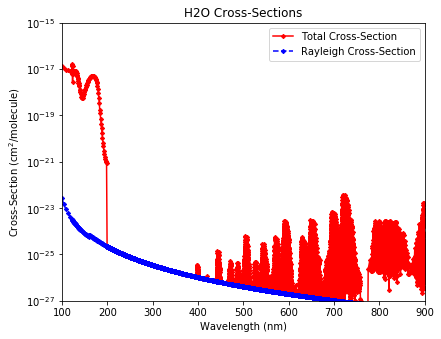

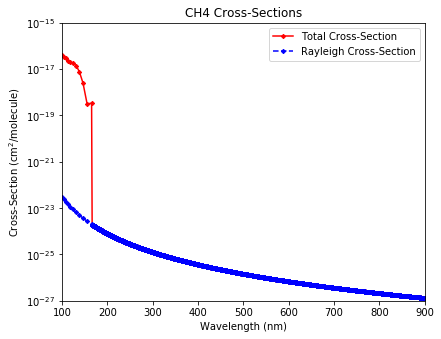

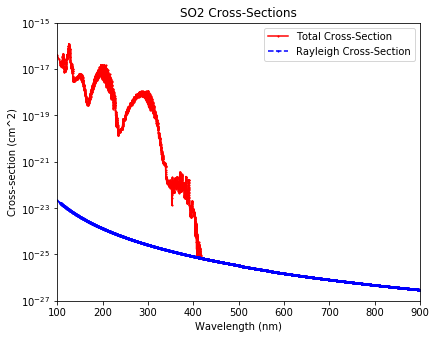

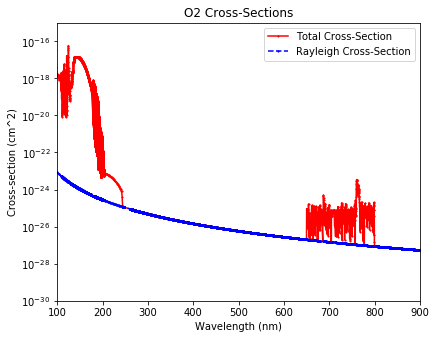

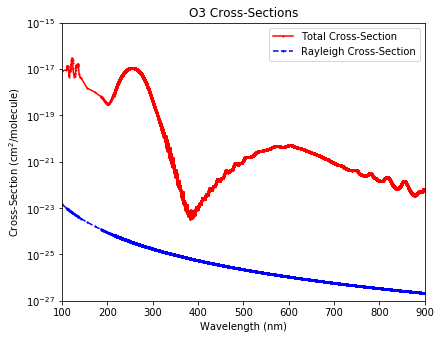

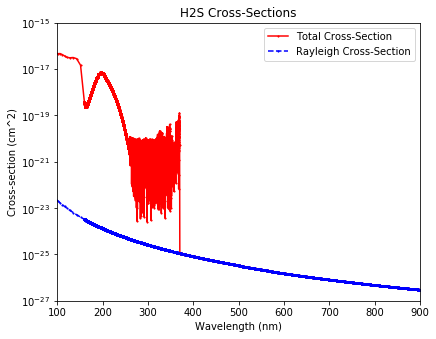

In [1]:
import numpy as np
import pdb
import matplotlib.pyplot as plt
import scipy.stats
from scipy import interpolate as interp
%matplotlib inline

def cm2inch(cm): #function to convert cm to inches; useful for complying with Astrobiology size guidelines
    return cm/2.54
"""
***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
"""
def rayleigh_scattering(wav, molecule):
    """
    This function calculates the Rayleigh scattering cross-section for different molecules as a function of wavelength. 
    Inputs: 
        wav=wavelength in nm
        molecule=molecule name. Options are (so far): n2, co2
    Outputs:
        rayleigh scattering cross section in cm2/molecule
    """
    #Useful quantities
    wav_um=wav*1.e-3 #wavelength in um (from nm)
    wavenum_cm=1.e4/wav_um #wavenumber in cm**-1
    
    #N2, CO2, O2, and Ar are treated using the formalism from Vardavas & Carver (1984). This formalism is in turn based on Allen's Astrophysical Quantities, Allen (1976) and Cox (2000); Vardavas and Carver simply plug in N=2.687e19 cm**-3 (STP) for alpha=(n-1)/(2*pi*N) in the expression xc=1.306e20*depolarization_factor*alpha**2/lambda**4 cm**2, lambda in um. This formalism accounts for wavelength-dependence of index of refraction (and hence polarizability) and includea a constant depolarization factor. 
    if molecule=='n2':
        A=29.06*1.e-5 #Cox (2000)
        B=7.7*1.e-3 #Cox (2000)
        depolarization_factor=0.0305 #Gucker & Basu (1953) via Penndorf (1957) via Cox (2000).
        
        KCF=(6.+3.*depolarization_factor)/(6.-7.*depolarization_factor) #King Correction Factor
        nminus1=(A*(1.+B/wav_um**2.)) #n-1, where n=refractive index at STP.
        xc=4.577e-21*KCF*(nminus1**2.)/(wav_um**4.) #Rayleigh xc in cm**2; 
    if molecule=='co2':
        A=43.9*1.e-5 #Cox (2000)
        B=6.4*1.e-3 #Cox (2000)
        depolarization_factor=0.0774 #Shemansky (1972). Earlier value of 0.0805 was from Gucker & Basu (1953) via Penndorf (1957), which is old. 
        
        KCF=(6.+3.*depolarization_factor)/(6.-7.*depolarization_factor)  #King Correction Factor
        nminus1=(A*(1.+B/wav_um**2.)) #n-1, where n=refractive index at STP.
        xc=4.577e-21*KCF*(nminus1**2.)/(wav_um**4.) #Rayleigh xc in cm**2; 
    if molecule=='o2':
        A=26.63*1.e-5 #Cox (2000)
        B=5.07*1.e-3 #Cox (2000)
        depolarization_factor=0.054 #Gucker & Basu (1953) via Penndorf (1957) via Cox (2000)
        
        KCF=(6.+3.*depolarization_factor)/(6.-7.*depolarization_factor)  #King Correction Factor
        nminus1=(A*(1.+B/wav_um**2.)) #n-1, where n=refractive index at STP.
        xc=4.577e-21*KCF*(nminus1**2.)/(wav_um**4.) #Rayleigh xc in cm**2; 
    if molecule=='ar':
        A=27.92*1.e-5 #Cox (2000)
        B=5.6*1.e-3 #Cox (2000)
        depolarization_factor=0.0006 #Value fromm Parthasarathy (1951) via Penndorf (1957). Earlier value of 0.032 was from Rayleigh (1919) via Penndorf (1957), which is old.
        
        KCF=(6.+3.*depolarization_factor)/(6.-7.*depolarization_factor)  #King Correction Factor
        nminus1=(A*(1.+B/wav_um**2.)) #n-1, where n=refractive index at STP.
        xc=4.577e-21*KCF*(nminus1**2.)/(wav_um**4.) #Rayleigh xc in cm**2; 
        
    #The Rayleigh scattering formalism for SO2, H2S and O3 is also treated with the AAA (Cox 2000) formalism. However, the A's and B's are not listed for these molecules. We therefore extrapolate from available polarizabilities for these molecules. Therefore, this treatment does not include full wavelength dependence of the polarizabilities. We weakly account for wavelength dependence of polarizability for SO2 and H2S by using different values at different wavelengths. We assume a constant depolarization_factor for O3, SO2, and 
    if molecule=='so2':
    #Polarizability taken from literature paper (not computed).        
        #We take our value for the polarizibilty and depolarization factor from Table 1 of Bogaard et al (1978). They report this quantity at 3 wavelengths: 488. nm, 514.5 nm, and 632.8 nm. We use whichever one is linearly closer
        alpha=np.zeros(np.shape(wav))
        depolarization_factor=np.zeros(np.shape(wav))

        inds0=np.where(wav<np.mean(np.array([488., 514.5]))) #For these inds use the value corresponding to 488. nm
        inds1=np.where((np.mean(np.array([488., 514.5]))<=wav) & (wav<=np.mean(np.array([514.5, 632.8])))) #for these inds use the value corresponding to 514.5 nm
        inds2=np.where(np.mean(np.array([514.5, 632.8]))<wav)#for these inds use the value corresponding to 6
        
        alpha[inds0]=alpha[inds0]+4.411e-40 #Polarizabilty of SO2 at 488 nm in C2m2/J 
        alpha[inds1]=alpha[inds1]+4.389e-40 #Polarizabilty of SO2 at 514.5 nm in C2m2/J 
        alpha[inds2]=alpha[inds2]+4.326e-40 #Polarizabilty of SO2 at 632.8 nm in C2m2/J 
        alpha=alpha/(1.11264e-16) #Convert from C2m2/J to cm^3
    
        depolarization_factor[inds0]=depolarization_factor[inds0]+0.0186#
#         depolarization_factor[inds1]=depolarization_factor[inds0]+0.0185#
#         depolarization_factor[inds2]=depolarization_factor[inds0]+0.0179#    
    
        KCF=(6.+3.*depolarization_factor)/(6.-7.*depolarization_factor)  #King Correction Factor
        xc=1.306e20*KCF*alpha**2./wav_um**4. #Cross-section in cm2. Taken from equation in Ch 5.3 of Cox (2000)
    if molecule=='h2s':
    #Polarizability taken from literature paper (not computed).
    
        #We take our value for the polarizibilty and depolarization factor from Table 1 of Bogaard et al (1978). They report this quantity at 3 wavelengths: 488. nm, 514.5 nm, and 632.8 nm. We use whichever one is linearly closer
        alpha=np.zeros(np.shape(wav))
        depolarization_factor=np.zeros(np.shape(wav))

        inds0=np.where(wav<np.mean(np.array([488., 514.5]))) #For these inds use the value corresponding to 488. nm
        inds1=np.where((np.mean(np.array([488., 514.5]))<=wav) & (wav<=np.mean(np.array([514.5, 632.8])))) #for these inds use the value corresponding to 514.5 nm
        inds2=np.where(np.mean(np.array([514.5, 632.8]))<wav)#for these inds use the value corresponding to 6
        
        alpha[inds0]=alpha[inds0]+4.290e-40 #Polarizabilty of SO2 at 488 nm in C2m2/J 
        alpha[inds1]=alpha[inds1]+4.267e-40 #Polarizabilty of SO2 at 514.5 nm in C2m2/J 
        alpha[inds2]=alpha[inds2]+4.199e-40 #Polarizabilty of SO2 at 632.8 nm in C2m2/J 
        alpha=alpha/(1.11264e-16) #Convert from C2m2/J to cm^3
        
        depolarization_factor[inds0]=depolarization_factor[inds0]+0.00062#
#         depolarization_factor[inds1]=depolarization_factor[inds0]+0.00061#
#         depolarization_factor[inds2]=depolarization_factor[inds0]+0.00044#
        
        KCF=(6.+3.*depolarization_factor)/(6.-7.*depolarization_factor)  #King Correction Factor
        xc=1.306e20*KCF*alpha**2./wav_um**4. #Cross-section in cm2. Taken from equation in Ch 5.3 of Cox (2000)

    if molecule=='o3':
    #Uses single value for polarizability. Depolarization_factor is taken to be a constant.
        KCF=1.06 # #King Correction Factor. Approximate value for near-UV calculations, based on an assumption from "Agents and Effects of Ozone Trends in the Atmosphere" by G. Brasseur and A. De Rudder, from the book "Stratospheric Ozone REduction, Solar Ultraviolet Radiation, and Plant Life" published 1986
        alpha=3.21e-24 #polarizability of O3 in cm^3; equal to the term \alpha=(n-1)/(2*pi*N) from Ch. 5 of Cox (2000). This particular value is taken from the CRC Handbook of Chemistry and Physics, 96th edition, chapter ATOMIC AND MOLECULAR POLARIZABILITIES, Table 4. Not known what reference wavelength this is for. So this includes no wavelength dependence.
        
        xc=1.306e20*KCF*alpha**2./wav_um**4. #Cross-section in cm2. Taken from equation in Ch 5.3 of Cox (2000)

    #CH4 Rayleigh scattering is treated with formalism from Sneep and Ubachs, 2004.
    if molecule=='ch4':
        depolarization_factor=0.0002 #0.0002 is an upper bound on the depolarization of CCl_4. Sneep & Ubachs assume the same value for methane because same structure. 
        KCF=(6.+3.*depolarization_factor)/(6.-7.*depolarization_factor)  #King Correction Factor
        
        n=1.+1.e-8*(46662.+4.02e-6*wavenum_cm**2.)# This is a rearrangement of equation 18 of Sneep & Ubachs
        nterm=((n**2-1.)/(n**2+2.))**2
        prefactor=24.*np.pi**3./(2.687e19)**2.
        
        xc_theoretical=prefactor*(wavenum_cm**4.)*nterm*KCF #King Correction Factor. This is equation 2 of Sneep & Ubachs.
        xc=xc_theoretical*0.85 #Rayleigh XC in cm**2. Sneep and Ubachs report that their methodology overestimates the cross-section at 532.2 nm by 15%. This assumes the whole methodology is off by that amount and corrects. IMPORTANT!

    if molecule=='h2o':
    #Discontinuity at 159.5 nm; treat by smoothing?
        depolarization_factor=0.000299 #This value is taken for water vapor specifically from Murphy (1977). This contrasts to what Ramses, von Paris, etc used which was for liquid water.
        KCF=(6.+3.*depolarization_factor)/(6.-7.*depolarization_factor)  #King Correction Factor
        
        
        nminus1_sa=np.zeros(np.shape(wav)) #n minus 1 for standard air.
        for ind in range(0, len(nminus1_sa)):#implements equation 4 of Bucholtz (1995). Two cases depending on wavelength (whether or not it is above or below 230 nm)
            if wav_um[ind]<0.23:
                if ((wav_um[ind]<.180) & (wav_um[ind] > .15945583)):
                    nminus1_sa[ind]=1.+1.e-8*(8060.51+2480990./(132.274-(1./wav_um[ind]**2))+17455.7/(39.32957-(1./.180**2)))
                elif ((wav_um[ind]>.140) & (wav_um[ind] <= .15945583)):
                    nminus1_sa[ind]=1.+1.e-8*(8060.51+2480990./(132.274-(1./wav_um[ind]**2))+17455.7/(39.32957-(1./.140**2)))
                else:
                    nminus1_sa[ind]=1.+1.e-8*(8060.51+2480990./(132.274-(1./wav_um[ind]**2))+17455.7/(39.32957-(1./wav_um[ind]**2)))
            else:
                nminus1_sa[ind]=1.+1.e-8*(5791817./(238.0185-(1./wav_um[ind]**2))+167909./(57.362-(1./wav_um[ind]**2)))
        
        nminus1=0.85*(nminus1_sa-1.) #Refractivity of water. Edlen (1966) writes that the refractivity of water vapor is about 15% lower than that of air at the same T and P.  Note that Edlen uses n-1 for the refractive index (as opposed to n, which is more standard).

        xc=4.577e-21*KCF*(nminus1**2./wav_um**4.) #Rayleigh XC in cm**2. This is taken from equation 1 of the erratum of Kopparapu et al (2013).
        
    

    
    return xc
#print rayleigh_scattering(210., 'n2')


"""
***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
"""

def produce_absorption_spectra(molecule):
    """
    The purpose of this code is to produce absorption spectra of a given molecule across all UV/VIS wavelengths for which it is available.
    input:
    -molecule (n2, co2, co2-cold, h2o, ch4, so2, h2s, o2, o3)
    Output:
    -writes file of cross-sections to ASCII file
    -Generates Python pickle file with same information (for easy, fast access)
    There are four columns to the output:
    1) wavelength in nm. If no wavelength scale is available for a portion of the spectrum (e.g. N2 b/c of lack of absorption data), then the wavelength is provided at a 0.1 nm grid.
    2) Absorption cross-sections in cm^2/molecule. In the case of "total absorption" files (e.g. the CO2 data we have) this is reported as total-rayleigh
    3) Rayleigh scattering cross-sections in cm^2/molecule. This is computed as outlined in PPC by Pierrehumbert
    4) Total cross-sections in cm^2/molecule. This is equal to the "total" cross-sections reported in some literature sources (e.g. Shemansky 1972). So this includes Rayleigh scattering.
    
    CO2: In order to include temperature dependence of CO2, 
    """
    import numpy as np
    import matplotlib.pyplot as plt
    import pdb

    if molecule=='n2':
        """
        Absorption cross-sections from 1-108 nm are taken from Chan et al (1993). According to the MPI Atlas, measurements were at 298K. 
        This paper uses dipole (electron energy loss) (e,e) spectroscopy.
        At wavelengths longer than 108 nm, absorption cross-sections are taken to be due purely to Rayleigh scattering.
        """
        importeddata=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/N2/MPI/N2_Chan(1993)_298K_6.2-113nm(e,e).txt', skip_header=0, skip_footer=0)
        
        litdata_wav=importeddata[0:-1:,0] #Literature data: wavelengths of total attenuation, in nm
        litdata_xc=importeddata[0:-1:,1] #Literature data: cross-sections of total attenuation in cm^2
        rayleigh_wav=np.arange(108.1, 900.1, step=0.1)#wavelength range for data under consideration
        wav=np.concatenate((litdata_wav, rayleigh_wav))
        
        tot_xc=np.concatenate((litdata_xc, rayleigh_scattering(rayleigh_wav, 'n2')))
        rayleigh_xc=rayleigh_scattering(wav, 'n2') #rayleigh scattering cross-section, cm^2

        ##Correct for any cases where Rayleigh exceeds total scattering by setting the total scattering to the Rayleigh value.
        inds=np.where(rayleigh_xc >= tot_xc)
        tot_xc[inds]=rayleigh_xc[inds]
        abs_xc=tot_xc-rayleigh_xc #absorption cross-section, defined as total cross-section minus rayleigh scattering cross-section
        
        ##Access the cross-sections from Eddie Schwieterman (UW) as an additional check
        #moredata=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/N2/Schwieterman/n2xsec.dat', skip_header=8, skip_footer=0)
        #schwieterman_wav=moredata[:,0]*1.e3 #convert from micron to nm
        #schwieterman_xc=moredata[:,1] #in cm^2
                
        fig1, ax1=plt.subplots(1, figsize=(cm2inch(16.5), cm2inch(13)))
        ax1.plot(wav,tot_xc, marker='D',markersize=3, markeredgecolor='red', color='red', label='Total Cross-Section')
        ax1.plot(wav,rayleigh_xc, marker='D', markersize=3, markeredgecolor='blue',  color='blue', linestyle='--', label='Rayleigh Cross-Section')
        #ax1.plot(litdata_wav, litdata_xc, marker='D', color='black', label='Literature Data')
        #ax1.plot(schwieterman_wav, schwieterman_xc, linestyle='--',color='green', label='Schwieterman data')
        ax1.set_yscale('log')
        ax1.legend(loc=0)
        ax1.set_xlim([100., 900.])
        ax1.set_ylim([1.e-30, 1.e-15])
        ax1.set_ylabel(r'Cross-Section (cm$^2$/molecule)')
        ax1.set_xlabel('Wavelength (nm)')
        ax1.set_title('N2 Cross-Sections')
    if molecule=='co2':
        """
        For wavelengths from 0.1254-201.6 nm, we use the dataset of Huestis & Berkowitz (2010). Their measurements agglomerate CO2 data at room temperature (~300 K). Based on a detailed reading of the Parkinson, Rufus, & Yoshino (2003) paper which is one of their key sources it seems, they are reporting *total* absorption cross section i.e. absorption+scattering. This is despite the fact that in text they only refer to the photoabsorption cross-section.
        
        For wavelengths from 201.6 nm to 204 nm, we use the work of Shemansky (1972). Their discussion implies pretty clearly that their cross-sections include both scattering and absorption. In particular, they argue that the extinction coefficient above 204 nm is due entirely to Rayleigh scattering.
        """
        huestberkdata=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/CO2/MPI-Mainz_Spectral_Atlas/CO2_HuestisBerkowitz(2010)_300K_0.1254-201.6nm(evaluation).txt', skip_header=0, skip_footer=0)
        huestberk_wav=huestberkdata[:,0] #wavelengths in nm
        huestberk_xc=huestberkdata[:,1] #cross-sections in cm2
        
        shemanskydata=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/CO2/MPI-Mainz_Spectral_Atlas/CO2_Shemansky(1972)_298K_169.57-300.00nm.txt', skip_header=0, skip_footer=0)
        shemansky_wav=shemanskydata[:,0] #wavelengths in nm
        shemansky_xc=shemanskydata[:,1] #cross-sections in cm2
        
        #First task is to splice these data together.
        huestberkinds=np.where(huestberk_wav<=200.)# MPI dataset goes past 201.6 nm, but 1) this is not attested in the original literature source and 2) coplotting with Shemansky suggests the additional data are wrong. We stop at 200 nm b/c there is a clear change in the resolution of the data at these wavelengths.
        shemanskyinds=np.where((shemansky_wav>200.) & (shemansky_wav<204.)) #We stop at 204 nm because past this point the extinction is essentially all due to Rayleigh scattering and is at very poor resolution. Hence for >204 nm we simply use Rayleigh scattering
        rayleighdominated_wav=np.arange(204., 900.1, step=0.1)#wavelength range for Rayleigh-dominated extinction.

        wav=np.concatenate((huestberk_wav[huestberkinds], shemansky_wav[shemanskyinds], rayleighdominated_wav)) #wavelength axis in nm    
        tot_xc=np.concatenate((huestberk_xc[huestberkinds], shemansky_xc[shemanskyinds], 
        rayleigh_scattering(rayleighdominated_wav, 'co2'))) #total scattering (rayleigh+abs), formed by concatenating Huestis & Berkowitz, Shemansky, and Rayleigh scattering model, in cm2/molecule

        rayleigh_xc=rayleigh_scattering(wav, 'co2') #extinction due to Rayleigh scattering (cm2)
        
        #Correct for any cases where Rayleigh exceeds total scattering by setting the total scattering to the Rayleigh value.
        inds=np.where(rayleigh_xc >= tot_xc)
        tot_xc[inds]=rayleigh_xc[inds]
        abs_xc=tot_xc-rayleigh_xc#absorption cross-section, defined as total cross-section minus rayleigh scattering cross-section

        #Access the cross-sections from Eddie Schwieterman (UW) as an additional check
        moredata=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/CO2/Schwieterman/co2xsec.dat', skip_header=8, skip_footer=0)
        schwieterman_wav=moredata[:,0]*1.e3 #convert from micron to nm
        schwieterman_xc=moredata[:,1] #in cm^2
        
        """
        Plot these vectors so that we can make sure everything is shipshape
        """
        fig1, ax1=plt.subplots(1, figsize=(cm2inch(16.5), cm2inch(13)))
        #ax1.plot(huestberk_wav[huestberkinds], huestberk_xc[huestberkinds], marker='o', color='black', label='Huestis & Berkowitz (2010)')
        #ax1.plot(shemansky_wav[shemanskyinds], shemansky_xc[shemanskyinds], marker='o', color='purple', label='Shemansky (1972)')
        ax1.plot(wav,tot_xc, marker='D',markersize=1, markeredgecolor='red', color='red', label='Total Cross-Section')
        ax1.plot(wav,rayleigh_xc, marker='D', markersize=1, markeredgecolor='blue',  color='blue', linestyle='--', label='Rayleigh Cross-Section')
        #ax1.plot(schwieterman_wav, schwieterman_xc, linestyle='--',color='green', label='Schwieterman data')
        ax1.set_yscale('log')
        ax1.legend(loc=0)
        ax1.set_xlim([100., 900.])
        ax1.set_ylim([1.e-27, 1.e-15])
        ax1.set_ylabel(r'Cross-Section (cm$^2$/molecule)')
        ax1.set_xlabel('Wavelength (nm)')
        ax1.set_title('CO2 Cross-Sections')
    if molecule=='co2-195':
        """
        We follow Hu+2012 in choosing low-temperature cross-sections
        For wavelengths from 0.1254-117.8 nm, we use the compilation of Huestis & Berkowitz (2010). Their measurements agglomerate CO2 data at room temperature (~300 K).
        From 106.15-118.7 nm, we use the dataset of Stark+2007 at 195K
        From 118.7-163 nm, we use the dataset of Yoshino+1996 at 195K
        From 163-192.5 nm, we use the dataset of Parkinson+2003 at 195K
        From 192.5-200 nm, we use the compilation of Huestis and Berkowitz (2010) again. 
        For 200-204 nm, we use the work of Shemansky (1972). 
        For >204 nm, we assume Rayleigh scattering. Shemansky (1972) made a convincing case that extinction at wavelengths longer than this is just Rayleigh.
        
        Hence, this formulation includes temperature dependence of CO2 for 195-~300K at wavelengths between 106.15-192.5 nm, and RT otherwise.
        """
        #RT
        huestberk_wav,huestberk_xc=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/CO2/MPI-Mainz_Spectral_Atlas/CO2_HuestisBerkowitz(2010)_300K_0.1254-201.6nm(evaluation).txt', skip_header=0, skip_footer=0,usecols=(0,1), unpack=True) #wavelengths in nm #cross-sections in cm2
        
        shemansky_wav, shemansky_xc=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/CO2/MPI-Mainz_Spectral_Atlas/CO2_Shemansky(1972)_298K_169.57-300.00nm.txt', skip_header=0, skip_footer=0,usecols=(0,1), unpack=True)#wavelengths in nm #cross-sections in cm2
        
        #195K
        co2_wav_stark_195, co2_xc_stark_195=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/CO2/MPI-Mainz_Spectral_Atlas/CO2_Stark(2007)_195K_106.15-118.70nm.txt', skip_header=0, skip_footer=0,usecols=(0,1), unpack=True )

        co2_wav_yoshino_195, co2_xc_yoshino_195=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/CO2/MPI-Mainz_Spectral_Atlas/CO2_Yoshino(1996)_195K_117.8-175.5nm.txt', skip_header=0, skip_footer=0,usecols=(0,1), unpack=True )
        
        co2_wav_parkinson_195, co2_xc_parkinson_195=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/CO2/MPI-Mainz_Spectral_Atlas/CO2_Parkinson(2003)_195K_163-192.5nm.txt', skip_header=0, skip_footer=0,usecols=(0,1), unpack=True )


        
        ###Splice these data together. First, isolate the relevant wavelength indices
        huestberkinds_1=np.where(huestberk_wav<106.15)
        
        #We use all the Stark data, so no cuts needed here
        
        yoshinoinds=np.where((co2_wav_yoshino_195>118.7) & (co2_wav_yoshino_195<163.))
        
        #We use all the Parkinson data, no cuts needed
        
        huestberkinds_2=np.where((huestberk_wav<=200.) & (huestberk_wav>192.5))# MPI dataset goes past 201.6 nm, but 1) this is not attested in the original literature source and 2) coplotting with Shemansky suggests the additional data are wrong. We stop at 200 nm b/c there is a clear change in the resolution of the data at these wavelengths.
        
        shemanskyinds=np.where((shemansky_wav>200.) & (shemansky_wav<204.)) #We stop at 204 nm because past this point the extinction is essentially all due to Rayleigh scattering and is at very poor resolution. Hence for >204 nm we simply use Rayleigh scattering
        rayleighdominated_wav=np.arange(204., 900.1, step=0.1)#wavelength range for Rayleigh-dominated extinction.
        
        ###Now, concatenate the selected datasets
        wav=np.concatenate((huestberk_wav[huestberkinds_1],co2_wav_stark_195, co2_wav_yoshino_195[yoshinoinds],co2_wav_parkinson_195,huestberk_wav[huestberkinds_2], shemansky_wav[shemanskyinds], rayleighdominated_wav)) #wavelength axis in nm    
        tot_xc=np.concatenate((huestberk_xc[huestberkinds_1],co2_xc_stark_195, co2_xc_yoshino_195[yoshinoinds],co2_xc_parkinson_195,huestberk_xc[huestberkinds_2], shemansky_xc[shemanskyinds], 
        rayleigh_scattering(rayleighdominated_wav, 'co2'))) #total scattering (rayleigh+abs), formed by concatenating Huestis & Berkowitz, Shemansky, and Rayleigh scattering model, in cm2/molecule

        rayleigh_xc=rayleigh_scattering(wav, 'co2') #extinction due to Rayleigh scattering (cm2)
        
        #Correct for any cases where Rayleigh exceeds total extinction by setting the total extinction to the Rayleigh value.
        inds=np.where(rayleigh_xc >= tot_xc)
        tot_xc[inds]=rayleigh_xc[inds]
        abs_xc=tot_xc-rayleigh_xc#absorption cross-section, defined as total cross-section minus rayleigh scattering cross-section
        
        """
        Plot these vectors so that we can make sure everything is shipshape
        """
        fig1, ax1=plt.subplots(1, figsize=(cm2inch(16.5), cm2inch(13)))
        ax1.plot(huestberk_wav, huestberk_xc, marker='o', color='black', label='Huestis & Berkowitz (2010)')
        ax1.plot(shemansky_wav[shemanskyinds], shemansky_xc[shemanskyinds], marker='o', color='purple', label='Shemansky (1972)')
        ax1.plot(wav,tot_xc, marker='D',markersize=1, markeredgecolor='red', color='red', label='Total Cross-Section (195K)')
        ax1.plot(wav,rayleigh_xc, marker='D', markersize=1, markeredgecolor='blue',  color='blue', linestyle='--', label='Rayleigh Cross-Section')
        ax1.set_yscale('log')
        ax1.legend(loc=0)
        ax1.set_xlim([100., 900.])
        ax1.set_ylim([1.e-27, 1.e-15])
        ax1.set_ylabel(r'Cross-Section (cm$^2$/molecule)')
        ax1.set_xlabel('Wavelength (nm)')
        ax1.set_title('CO2 Cross-Sections')
    if molecule=='h2o':
        """
        Technique notes: dipole (e,e) spectroscopy = electron-electron coincidence method. Googling also suggests it is the same as electron-energy loss spectroscopy
        
        For a guide to cross-sections, we use as a guide the "Chemical Kinetics and Photochemical Data for Use in Atmospheric Studies, Evaluation Number 17" published by JPL. 
        
        Primary Sequence
        6.2-118.08 nm: Chan et al (1993)
        121-198 nm: JPL recommendation, compiled primarily from Yoshino et al (1996-7) and Parkinson & Yoshino (2003). They define their cross-sections via Beer-Lambert law, meaning they are measuring total extinction. 298 K.
        198-396 nm: assumed to be purely Rayleigh scattering
        ####290-350 nm: Du et al (2013) cross-sections NOT used based on recent work based on multiple streams of evidence refuting it.
        396-755 nm: Coheur (2002)/Fally(2003). Work seems to be based on gas-cell absorption so should be for total cross-section. 
        775-1081 nm: Merienne (2003). Again seems to be gas-cell absorption work, so should be total cross-section. 
        Checks
        Mota 2005: 298 K, 114.8-193.9 nm
        Chan et al 1993: 6.2-206.64 nm at 298 K. Again, measured by dipole (e,e) spectroscopy. Article states it is photoabsorption.
        """
        
        #Load primary data stream
        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/H2O/H2O_Chan(1993)_298K_6.20-206.64nm(e,e).txt', skip_header=0, skip_footer=0)
        chan_wav=data[0:179,0] #wavelengths in nm
        chan_xc=data[0:179,1] #cross-sections in cm2

        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/H2O/H2O_JPL-2010(2011)_298K_121-198nm(rec).txt', skip_header=0, skip_footer=0)
        jpl_wav=data[:,0] #wavelengths in nm
        jpl_xc=data[:,1] #cross-sections in cm2

        rayleigh_wav_1=np.arange(199.,  396.1, step=0.1)#No absorption data; assume Rayleigh-dominated
        
        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/H2O/H2O_Coheur(2002),Fally(2003)_290K_396-755nm(line intensities).txt', skip_header=0, skip_footer=0)
        coheurfally_wav=data[:,0] #wavelengths in nm
        coheurfally_xc=data[:,1] #cross-sections in cm2

        #The Coheur-Fally dataset has several discontinuous blocks. Let's fix those with Rayleigh scattering.
        rayleigh_cf_wav_1=np.arange(401.5, 415.0, step=0.1)
        rayleigh_cf_wav_2=np.arange(422.0, 425.6, step=0.1)
        rayleigh_cf_wav_3=np.arange(429.6, 435.3, step=0.1)
        
        rayleigh_wav_3=np.arange(759., 775., step=0.1)
        
        #This file has several entries which have a wavelength but no cross-section. Setting invalid_raise=0 causes Python to skip those lines, but it will generate a Warning. Ignore.
        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/H2O/H2O_Merienne(2003)_293.1K_775-1081nm(line intensities).txt', skip_header=0, skip_footer=0, invalid_raise=False) 
        merienne_wav=data[:,0] #wavelengths in nm
        merienne_xc=data[:,1] #cross-sections in cm2

        #Form unified dataset
        wav=np.concatenate((chan_wav, jpl_wav,rayleigh_wav_1, coheurfally_wav,rayleigh_wav_3, merienne_wav,rayleigh_cf_wav_1,rayleigh_cf_wav_2,rayleigh_cf_wav_3)) #wavelength axis in nm. Spacing between datasets is small enough that we are for the time being not padding the data with Rayleigh-dominated wavelengths.    
        
        #Compute Rayleigh scattering
        rayleigh_xc=rayleigh_scattering(wav, 'h2o') #extinction due to Rayleigh scattering (cm2)
        rayleigh_xc_blk1=rayleigh_scattering(rayleigh_wav_1, 'h2o')
        rayleigh_xc_blk3=rayleigh_scattering(rayleigh_wav_3, 'h2o')
        rayleigh_cf_xc_1=rayleigh_scattering(rayleigh_cf_wav_1, 'h2o')
        rayleigh_cf_xc_2=rayleigh_scattering(rayleigh_cf_wav_2, 'h2o')
        rayleigh_cf_xc_3=rayleigh_scattering(rayleigh_cf_wav_3, 'h2o')
        
        tot_xc=np.concatenate((chan_xc, jpl_xc, rayleigh_xc_blk1, coheurfally_xc,rayleigh_xc_blk3, merienne_xc,rayleigh_cf_xc_1,rayleigh_cf_xc_2,rayleigh_cf_xc_3)) #total scattering (rayleigh+abs), formed by concatenating Au et al (1994) and the Rayleigh scattering model, in cm2/molecule
        
        sortinds=np.argsort(wav)
        wav=wav[sortinds]
        tot_xc=tot_xc[sortinds]
        rayleigh_xc=rayleigh_xc[sortinds]

        #Correct for any cases where Rayleigh exceeds total scattering by setting the total scattering to the Rayleigh value.
        inds=np.where(rayleigh_xc >= tot_xc)
        tot_xc[inds]=rayleigh_xc[inds]
        abs_xc=tot_xc-rayleigh_xc#absorption cross-section, defined as total cross-section minus rayleigh scattering cross-section
                
        """
        Plot these vectors so that we can make sure everything is shipshape
        """
        fig1, ax1=plt.subplots(1, figsize=(cm2inch(16.5), cm2inch(13)))
        ax1.plot(wav,tot_xc, marker='D',markersize=3, markeredgecolor='red', color='red', label='Total Cross-Section')
        ax1.plot(wav,rayleigh_xc, marker='D', markersize=3, markeredgecolor='blue',  color='blue', linestyle='--', label='Rayleigh Cross-Section')
        ax1.set_yscale('log')
        ax1.legend(loc=0)
        ax1.set_xlim([100., 900.])
        ax1.set_ylim([1.e-27, 1.e-15])
        ax1.set_ylabel(r'Cross-Section (cm$^2$/molecule)')
        ax1.set_xlabel('Wavelength (nm)')
        ax1.set_title('H2O Cross-Sections')

    if molecule=='ch4':
        """
        For wavelengths from 5.6-165 nm, we use the data of Au et al (1993). These data were taken at 298 K according to the MPI-Mainz metadata (file name). These data are based on dipole (e,e) spectroscopy conducted by the authors. The authors describe their data as "photoabsorption oscillator strength (cross-section) data". 
        QUESTION: does this mean this is JUST absorption cross-section, or absorption+scattering?
        
        For wavelengths from 165-185 nm, Mount, Warden and Moos (1977) set upper limits of order 1e-23, but did not measure an XC.
        For wavelengths from 185-400 nm, no absorption cross-sections have been measured. See the table in Chen & Wu (2004) and the nondetection reported in Thompson, Harteck and Reeves (1963). The latter work constrains the xc to be below 1e-23 cm2, according to the abstract of Mount, Warden and Moos (1977).
        
        Hence for wavelengths 166 nm and longer, I assume Rayleigh scattering is the sole extinction source.
        
        I plot the data of Chen & Wu (2004) as a consistency check on the XC that we have. They agree at shortwave (up until about 135 nm) but disagree for longer wavelengths, reaching a difference of 1 order of magnitude for 142 nm. This is a significant difference but 1) is over just 5 nm 2) is in a region of the spectrum deeply shielded by other absorbers. So the impact is minimal. To maintain the use of a single uniform dataset, I elect to stick with Au et al (1994).
        """
        audata=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/CH4/Au1993/CH4_Au(1993)_298K_5.6-165nm(e,e).txt', skip_header=0, skip_footer=0)
        au_wav=audata[:,0] #wavelengths in nm
        au_xc=audata[:,1] #cross-sections in cm2
        
        

        rayleighdominated_wav=np.arange(166., 900.1, step=0.1)#wavelength range for Rayleigh-dominated extinction.
        wav=np.concatenate((au_wav, rayleighdominated_wav)) #wavelength axis in nm            
        tot_xc=np.concatenate((au_xc,rayleigh_scattering(rayleighdominated_wav, 'ch4'))) #total scattering (rayleigh+abs), formed by concatenating Au et al (1994) and the Rayleigh scattering model, in cm2/molecule

        rayleigh_xc=rayleigh_scattering(wav, 'ch4') #extinction due to Rayleigh scattering (cm2)
        
        #Correct for any cases where Rayleigh exceeds total scattering by setting the total scattering to the Rayleigh value.
        inds=np.where(rayleigh_xc >= tot_xc)
        tot_xc[inds]=rayleigh_xc[inds]
        abs_xc=tot_xc-rayleigh_xc#absorption cross-section, defined as total cross-section minus rayleigh scattering cross-section

        #Access the cross-sections from Chen & Wu (2004) as a cross-check
        chenwudata=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/CH4/ChenWu2004/MPI-Mainz/CH4_ChenWu(2004)_295K_120-142nm.txt', skip_header=0, skip_footer=0)
        chenwu_wav=chenwudata[:,0] #wavelengths in nm
        chenwu_xc=chenwudata[:,1] #cross-sections in cm2
        
        
        """
        Plot these vectors so that we can make sure everything is shipshape
        """
        fig1, ax1=plt.subplots(1, figsize=(cm2inch(16.5), cm2inch(13)))
        ax1.plot(wav,tot_xc, marker='D',markersize=3, markeredgecolor='red', color='red', label='Total Cross-Section')
        ax1.plot(wav,rayleigh_xc, marker='D', markersize=3, markeredgecolor='blue',  color='blue', linestyle='--', label='Rayleigh Cross-Section')
        #ax1.plot(chenwu_wav, chenwu_xc,marker='s',color='green', label='Chen & Wu (2004) Data')
        ax1.set_yscale('log')
        ax1.legend(loc=0)
        ax1.set_xlim([100., 900.])
        ax1.set_ylim([1.e-27, 1.e-15])
        ax1.set_ylabel(r'Cross-Section (cm$^2$/molecule)')
        ax1.set_xlabel('Wavelength (nm)')
        ax1.set_title('CH4 Cross-Sections')

    if molecule=='so2':
        """
        <106 nm: Feng+1999
        106-403.7 nm: Manatt and Lane 1993. Compilation
        for 403.7-416.5 nm: Vandaele, Hermans, Fally 2009. NOTE many cross-sections in this work are negative! Reason for this not understood. These negative cross-sections are removed.
        
        Well-consistent with cross-checks.
        """
        
        #Load usable data stream
        
        #data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/SO2/SO2_Cooper(1991)_298K_7.7-248nm(e,e).txt', skip_header=0, skip_footer=0)
        #cooper_wav=data[0:129,0] #wavelengths in nm
        #cooper_xc=data[0:129,1] #cross-sections in cm2 #129

        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/SO2/SO2_Feng(1999)_298K_4.77-248nm(e,e).txt', skip_header=0, skip_footer=0)
        feng_wav=data[0:317,0] #wavelengths in nm
        feng_xc=data[0:317,1] #cross-sections in cm2

        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/SO2/SO2_ManattLane(1993)_293K_106.1-403.7nm.txt', skip_header=0, skip_footer=0)
        ml_wav=data[:,0] #wavelengths in nm
        ml_xc=data[:,1] #cross-sections in cm2

        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/SO2/SO2_VandaeleHermansFally(2009)_298K_227.275-416.658nm.txt', skip_header=0, skip_footer=0)
        vhf_wav=data[:,0] #wavelengths in nm
        vhf_xc=data[:,1] #cross-sections in cm2
        #remove negative cross-sections
        indstodelete=np.where(vhf_xc <= 0.0)
        vhf_wav=np.delete(vhf_wav, indstodelete)
        vhf_xc=np.delete(vhf_xc, indstodelete)
        #reduce to non-overlapping data
        inds2=np.where(vhf_wav>403.7)
        vhf_wav=vhf_wav[inds2]
        vhf_xc=vhf_xc[inds2]

        rayleighdominated_wav=np.arange(np.ceil(vhf_wav[-1]), 900.1, step=0.1)#wavelength range for Rayleigh-dominated extinction.
        
        #Form unified dataset
        wav=np.concatenate((feng_wav, ml_wav, vhf_wav, rayleighdominated_wav)) #wavelength axis in nm. Spacing between datasets is small enough that we are for the time being not padding the data with Rayleigh-dominated wavelengths.    
        rayleigh_xc=rayleigh_scattering(wav, 'so2') #extinction due to Rayleigh scattering (cm2)
        tot_xc=np.concatenate((feng_xc, ml_xc,vhf_xc, rayleigh_scattering(rayleighdominated_wav, 'so2'))) #total scattering (rayleigh+abs)
        

        #Correct for any cases where Rayleigh exceeds total scattering by setting the total scattering to the Rayleigh value.
        inds=np.where(rayleigh_xc >= tot_xc)
        tot_xc[inds]=rayleigh_xc[inds]
        abs_xc=tot_xc-rayleigh_xc#absorption cross-section, defined as total cross-section minus rayleigh scattering cross-section
        
        #Load other datasets to plot as a check. 
        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/SO2/SO2_Danielache(2008)_293K_183-350nm(32SO2).txt', skip_header=0, skip_footer=0)
        danielache_wav=data[:,0] #wavelengths in nm
        danielache_xc=data[:,1] #cross-sections in cm2        
        
        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/SO2/Schwieterman/so2xsec.dat', skip_header=8, skip_footer=0)
        schwieterman_wav=data[:,0]*1.e3 #convert from micron to nm
        schwieterman_xc=data[:,1] #in cm^2
                
        """
        Plot these vectors so that we can make sure everything is shipshape
        """
        fig1, ax1=plt.subplots(1, figsize=(cm2inch(16.5), cm2inch(13)))
        ax1.plot(wav,tot_xc, marker='D',markersize=1, markeredgecolor='red', color='red', label='Total Cross-Section')
        ax1.plot(wav,rayleigh_xc, marker='D', markersize=1, markeredgecolor='blue',  color='blue', linestyle='--', label='Rayleigh Cross-Section')
        #ax1.plot(schwieterman_wav, schwieterman_xc, linestyle='-', color='orange',  label='Schwieterman')
        #ax1.plot(danielache_wav, danielache_xc, linestyle='-', color='yellow',  label='Danielache')
        ax1.set_xlim([100., 900.])
        ax1.set_ylim([1.e-27, 1.e-15])
        ax1.set_yscale('log')
        ax1.legend(loc=0)
        ax1.set_ylabel('Cross-section (cm^2)')
        ax1.set_xlabel('Wavelength (nm)')
        ax1.set_title('SO2 Cross-Sections')
    if molecule=='so2-200':
        """
        We follow Hu+2012 in choosing low-temperature cross-sections
        <106 nm: Feng+1999 (298K)
        106-169.555 nm: Manatt and Lane 1993 (~293 K compilation)
        169.555-239 nm: Wu+2000 (200 K)
        239-330 nm: Bogumil+2003 (203 K ~ 200 K)
        330-403.7 nm: Manatt and Lane 1993 (~293 K compilation)
        403.7-416.5 nm: Vandaele, Hermans, Fally 2009. NOTE many cross-sections in this work are negative! Reason for this not understood. These negative cross-sections are removed.
        
        Hence, this formulation includes temperature dependence of SO2 for ~200-293 at wavelengths between 169.555-330 nm, and RT otherwise.
        """
        #####LOAD RT DATA        
        feng_wav, feng_xc=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/SO2/SO2_Feng(1999)_298K_4.77-248nm(e,e).txt', skip_header=0, skip_footer=0, usecols=(0,1), unpack=True) #wavelengths in nm #cross-sections in cm2

        ml_wav, ml_xc=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/SO2/SO2_ManattLane(1993)_293K_106.1-403.7nm.txt', skip_header=0, skip_footer=0, usecols=(0,1), unpack=True) #wavelengths in nm #cross-sections in cm2
    
        vhf_wav, vhf_xc=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/SO2/SO2_VandaeleHermansFally(2009)_298K_227.275-416.658nm.txt', skip_header=0, skip_footer=0, usecols=(0,1), unpack=True) #wavelengths in nm #cross-sections in cm2
        #remove negative cross-sections
        indstodelete=np.where(vhf_xc <= 0.0)
        vhf_wav=np.delete(vhf_wav, indstodelete)
        vhf_xc=np.delete(vhf_xc, indstodelete)
        
        #######LOAD 200K DATA
        so2_wav_bog_203, so2_xc_bog_203=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/SO2/SO2_Bogumil(2003)_203K_239-395nm.txt', skip_header=0, skip_footer=0,usecols=(0,1), unpack=True)

        so2_wav_wu_200, so2_xc_wu_200=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/SO2/SO2_Wu(2000)_200K_169.555-297.545nm.txt', skip_header=0, skip_footer=0,usecols=(0,1), unpack=True)
        

        ###Splice these data together. First, isolate the relevant wavelength indices
        fenginds=np.where(feng_wav<106.1)
        
        manattinds_1=np.where(ml_wav<165.555)

        wuinds=np.where(so2_wav_wu_200<238.9581) #terminate at Bogumil cross-section start

        boginds=np.where(so2_wav_bog_203<=330.) #terminate at 330 nm b/c no longer trust cross-section measurements

        manattinds_2=np.where(ml_wav>330.)

        vhfinds=np.where(vhf_wav>403.7) #start where Manatt+Lane ends

        rayleighdominated_wav=np.arange(np.ceil(vhf_wav[-1]), 900.1, step=0.1)#wavelength range for Rayleigh-dominated extinction.
        
        ###Now, concatenate the selected datasets
        wav=np.concatenate((feng_wav[fenginds],ml_wav[manattinds_1], so2_wav_wu_200[wuinds],so2_wav_bog_203[boginds],ml_wav[manattinds_2], vhf_wav[vhfinds], rayleighdominated_wav)) #wavelength axis in nm    
        tot_xc=np.concatenate((feng_xc[fenginds],ml_xc[manattinds_1], so2_xc_wu_200[wuinds],so2_xc_bog_203[boginds],ml_xc[manattinds_2], vhf_xc[vhfinds], 
        rayleigh_scattering(rayleighdominated_wav, 'so2'))) #total scattering (rayleigh+abs), formed by concatenating Huestis & Berkowitz, Shemansky, and Rayleigh scattering model, in cm2/molecule

        rayleigh_xc=rayleigh_scattering(wav, 'so2') #extinction due to Rayleigh scattering (cm2)
        
        #Correct for any cases where Rayleigh exceeds total extinction by setting the total extinction to the Rayleigh value.
        inds=np.where(rayleigh_xc >= tot_xc)
        tot_xc[inds]=rayleigh_xc[inds]
        abs_xc=tot_xc-rayleigh_xc#absorption cross-section, defined as total cross-section minus rayleigh scattering cross-section
        
        """
        Plot these vectors so that we can make sure everything is shipshape
        """
        fig1, ax1=plt.subplots(1, figsize=(cm2inch(16.5), cm2inch(13)))
        ax1.plot(ml_wav, ml_xc, marker='o', color='black', label='Manatt & Lane (1993)')
        ax1.plot(wav,tot_xc, marker='D',markersize=1, markeredgecolor='red', color='red', label='Total Cross-Section (200K)')
        ax1.plot(wav,rayleigh_xc, marker='D', markersize=1, markeredgecolor='blue',  color='blue', linestyle='--', label='Rayleigh Cross-Section')
        ax1.set_yscale('log')
        ax1.legend(loc=0)
        ax1.set_xlim([100., 900.])
        ax1.set_ylim([1.e-27, 1.e-15])
        ax1.set_ylabel(r'Cross-Section (cm$^2$/molecule)')
        ax1.set_xlabel('Wavelength (nm)')
        ax1.set_title('SO2 (200K) Cross-Sections')
    if molecule=='h2s':
        """
        4.765-151.20 nm: Feng (1999)
        159.465-259.460 nm: Wu & Chen (1998), as recommended by JPL document
        259.461-370.007: Grosch et al (2015). NOTE many cross-sections in this work are negative! Reason for this not understood. These negative cross-sections are removed.
        """
        
        #Load usable data stream
        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/H2S/H2S_Feng(1999)_298K_4.77-238.4nm(e,e).txt', skip_header=0, skip_footer=0)
        feng_wav=data[0:286,0] #wavelengths in nm
        feng_xc=data[0:286,1] #cross-sections in cm2
                
        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/H2S/H2S_WuChen(1998)_295K_160-260nm.txt', skip_header=0, skip_footer=0)
        wc_wav=data[:,0] #wavelengths in nm
        wc_xc=data[:,1] #cross-sections in cm2

        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/H2S/H2S_Grosch(2015)_294.8K_198-370nm.txt', skip_header=0, skip_footer=0)
        g_wav=data[:,0] #wavelengths in nm
        g_xc=data[:,1] #cross-sections in cm2
        #remove negative cross-sections
        indstodelete=np.where(g_xc <= 0.0)
        g_wav=np.delete(g_wav, indstodelete)
        g_xc=np.delete(g_xc, indstodelete)
        #reduce to non-overlapping data
        inds2=np.where(g_wav>259.460)
        g_wav=g_wav[inds2]
        g_xc=g_xc[inds2]

        rayleighdominated_wav_2=np.arange(370.10, 900.1, step=0.1)
        
        #Form unified dataset
        wav=np.concatenate((feng_wav,  wc_wav, g_wav, rayleighdominated_wav_2)) #wavelength axis in nm. Spacing between datasets is small enough that we are for the time being not padding the data with Rayleigh-dominated wavelengths.    
        rayleigh_xc=rayleigh_scattering(wav, 'so2') #extinction due to Rayleigh scattering (cm2)
        tot_xc=np.concatenate((feng_xc, wc_xc, g_xc, rayleigh_scattering(rayleighdominated_wav_2, 'h2s'))) #total scattering (rayleigh+abs)
        
        #Correct for any cases where Rayleigh exceeds total scattering by setting the total scattering to the Rayleigh value.
        inds=np.where(rayleigh_xc >= tot_xc)
        tot_xc[inds]=rayleigh_xc[inds]
        abs_xc=tot_xc-rayleigh_xc#absorption cross-section, defined as total cross-section minus rayleigh scattering cross-section
        
        """
        Plot these vectors so that we can make sure everything is shipshape
        """
        fig1, ax1=plt.subplots(1, figsize=(cm2inch(16.5), cm2inch(13)))
        ax1.plot(wav,tot_xc, marker='D',markersize=1, markeredgecolor='red', color='red', label='Total Cross-Section')
        ax1.plot(wav,rayleigh_xc, marker='D', markersize=1, markeredgecolor='blue',  color='blue', linestyle='--', label='Rayleigh Cross-Section')
        ax1.set_xlim([100., 900.])
        ax1.set_ylim([1.e-27, 1.e-15])
        ax1.set_yscale('log')
        ax1.legend(loc=0)
        ax1.set_ylabel('Cross-section (cm^2)')
        ax1.set_xlabel('Wavelength (nm)')
        ax1.set_title('H2S Cross-Sections')

    if molecule=='o2':
        """        
        For a guide to cross-sections, we use as a guide the "Chemical Kinetics and Photochemical Data for Use in Atmospheric Studies, Evaluation Number 17" published by JPL. 
        0.99- 108.570: Huffman 1969
        108.75-130.0: Ogawa & Ogawa 1975
        130.04-175.24 nm: Yoshino+2005. Absorption cell measurements, 1 receiver=total cross section reported.
        179.2-202.6: Yoshino+1992
        205-245 nm: JPL-recommended file, 295 K
        245-389 nm: Bogumili+2003, 293 K (selected down)
        650-799.6 nm: Bogumili+2003, 293 K ALTERNATE: Greenblatt 1990
        """
        
        #Load usable data stream
        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_Huffman(1969)_295K_1-122nm.txt', skip_header=0, skip_footer=3)
        h_wav=data[:,0] #wavelengths in nm
        h_xc=data[:,1] #cross-sections in cm2    

        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_OgawaOgawa(1975)_298K_108-160nm(X).txt', skip_header=0, skip_footer=0)
        oo_wav=data[0:245,0] #wavelengths in nm
        oo_xc=data[0:245,1] #cross-sections in cm2    
        
        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_Yoshino(2005)_295K_130.04-175.24nm.txt', skip_header=0, skip_footer=0)
        y2005_wav=data[:,0] #wavelengths in nm
        y2005_xc=data[:,1] #cross-sections in cm2
        #These data truncate at 130.04, whereas the absolute cross-sections extend to 129.62. For the sake of getting all the >130 nm absorption accounted for, we concatenate the first absolute absorption cross-section data to this file.
        y2005_wav=np.append(np.array(129.62),y2005_wav)
        y2005_xc=np.append(np.array(5.11e-19),y2005_xc)
        
        #The Yoshino et al (1992) dataset is split over many files, we need to stack them all together:
        data1=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_Yoshino(1992)_300K_179.2-180.2nm(12-0).txt', skip_header=0, skip_footer=0)
        data2=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_Yoshino(1992)_300K_180.2-181.4nm(11-0).txt', skip_header=0, skip_footer=0)
        data3=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_Yoshino(1992)_300K_181.4-182.9nm(10-0).txt', skip_header=0, skip_footer=0)
        data4=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_Yoshino(1992)_300K_182.9-184.3nm(9-0).txt', skip_header=0, skip_footer=0)
        data5=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_Yoshino(1992)_300K_184.3-186.1nm(8-0).txt', skip_header=0, skip_footer=0)
        data6=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_Yoshino(1992)_300K_186.1-187.8nm(7-0).txt', skip_header=0, skip_footer=0)
        data7=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_Yoshino(1992)_300K_187.8-189.9nm(6-0).txt', skip_header=0, skip_footer=0)
        data8=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_Yoshino(1992)_300K_189.9-192.4nm(5-0).txt', skip_header=0, skip_footer=0)
        data9=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_Yoshino(1992)_300K_192.4-195.7nm(4-0).txt', skip_header=0, skip_footer=0)
        data10=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_Yoshino(1992)_300K_195.7-197.2nm(3-0).txt', skip_header=0, skip_footer=0)
        data11=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_Yoshino(1992)_300K_197.2-199.8nm(2-0).txt', skip_header=0, skip_footer=0)
        data12=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_Yoshino(1992)_300K_199.8-202.6nm(1-0).txt', skip_header=0, skip_footer=0)
        data=np.vstack((data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12))
        y1992_wav=data[:,0]
        y1992_xc=data[:,1]
        
        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_JPL-2010(2011)_298K_205-245nm(rec).txt', skip_header=0, skip_footer=0)
        jpl_wav=data[:,0] #wavelengths in nm
        jpl_xc=data[:,1] #cross-sections in cm2
        
        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_Fally(2000)_287-289K_240-294nm.txt', skip_header=0, skip_footer=0)
        fally_wav=data[:,0] #wavelengths in nm
        fally_xc=data[:,1] #cross-sections in cm2    
        inds=np.where(fally_wav>245.)
        fally_wav=fally_wav[inds]
        fally_xc=fally_xc[inds]
        #remove negative cross-sections
        indstodelete=np.where(fally_xc <= 0.0)
        fally_wav=np.delete(fally_wav, indstodelete)
        fally_xc=np.delete(fally_xc, indstodelete)

        rayleighdominated_wav_1=np.arange(294.1, 649.9, step=0.1)
        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_Bogumil(2003)_293K_650-799.6nm.txt', skip_header=0, skip_footer=0)
        b2003_wav=data[:,0] #wavelengths in nm
        b2003_xc=data[:,1] #cross-sections in cm2    
        #remove negative cross-sections
        indstodelete=np.where(b2003_xc <= 0.0)
        b2003_wav=np.delete(b2003_wav, indstodelete)
        b2003_xc=np.delete(b2003_xc, indstodelete)
        rayleighdominated_wav_2=np.arange(800., 900.1, step=0.1)#wavelength range for Rayleigh-dominated extinction.
        
        wav=np.concatenate((h_wav, oo_wav, y2005_wav,y1992_wav, jpl_wav,fally_wav, rayleighdominated_wav_1, b2003_wav, rayleighdominated_wav_2)) #wavelength axis in nm. Spacing between datasets is small enough that we are for the time being not padding the data with Rayleigh-dominated wavelengths.    
        rayleigh_xc=rayleigh_scattering(wav, 'o2') #extinction due to Rayleigh scattering (cm2)
        tot_xc=np.concatenate((h_xc, oo_xc, y2005_xc, y1992_xc,jpl_xc,fally_xc,rayleigh_scattering(rayleighdominated_wav_1,'o2'), b2003_xc,rayleigh_scattering(rayleighdominated_wav_2,'o2'))) #total scattering (rayleigh+abs)
        
        
        
        #rayleighdominated_wav_1=np.arange(294.1, 682.6, step=0.1)        
        #data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_Greenblatt(1990)_296K_650-789nm_mod.txt', skip_header=0, skip_footer=0)
        #greenblatt_wav=data[:,0] #wavelengths in nm
        #greenblatt_xc=data[:,1] #cross-sections in cm2    
        #rayleighdominated_wav_2=np.arange(783.1, 900.1, step=0.1)#wavelength range for Rayleigh-dominated extinction

        #wav=np.concatenate((h_wav, oo_wav, y2005_wav,y1992_wav, jpl_wav,fally_wav, rayleighdominated_wav_1, greenblatt_wav, rayleighdominated_wav_2)) #wavelength axis in nm. Spacing between datasets is small enough that we are for the time being not padding the data with Rayleigh-dominated wavelengths.    
        #rayleigh_xc=rayleigh_scattering(wav, 'o2') #extinction due to Rayleigh scattering (cm2)
        #tot_xc=np.concatenate((h_xc, oo_xc, y2005_xc, y1992_xc,jpl_xc,fally_xc,rayleigh_scattering(rayleighdominated_wav_1,'o2'), greenblatt_xc,rayleigh_scattering(rayleighdominated_wav_2,'o2'))) #total scattering (rayleigh+abs)
        
        ##Load other datasets to plot as a check. 
        #data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_Greenblatt(1990)_296K_650-789nm.txt', skip_header=0, skip_footer=0)
        #greenblatt_wav=data[:,0] #wavelengths in nm
        #greenblatt_xc=data[:,1] #cross-sections in cm2    
        
        #data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_FrederickMentall(1982)_300K_176-243nm.txt', skip_header=0, skip_footer=0)
        #frederick_wav=data[:,0] #wavelengths in nm
        #frederick_xc=data[:,1] #cross-sections in cm2            

        #data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_Brion(1979)_298K_4.1-248nm(e,e).txt', skip_header=0, skip_footer=0)
        #b_wav=data[:,0] #wavelengths in nm
        #b_xc=data[:,1] #cross-sections in cm2    
        
        #data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_Fally(2000)_287-289K_240-294nm.txt', skip_header=0, skip_footer=0)
        #fally_wav=data[:,0] #wavelengths in nm
        #fally_xc=data[:,1] #cross-sections in cm2    
                
        #data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_Bogumil(2003)_243K_234-440nm.txt', skip_header=0, skip_footer=0)
        #b_lowtemp1_wav=data[:,0] #wavelengths in nm
        #b_lowtemp1_xc=data[:,1] #cross-sections in cm2    
        
        #data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O2/O2_Bogumil(2003)_243K_650-799.6nm.txt', skip_header=0, skip_footer=0)
        #b_lowtemp2_wav=data[:,0] #wavelengths in nm
        #b_lowtemp2_xc=data[:,1] #cross-sections in cm2    
        
        
        #Correct for any cases where Rayleigh exceeds total scattering by setting the total scattering to the Rayleigh value.
        inds=np.where(rayleigh_xc >= tot_xc)
        tot_xc[inds]=rayleigh_xc[inds]
        abs_xc=tot_xc-rayleigh_xc#absorption cross-section, defined as total cross-section minus rayleigh scattering cross-section


        """
        Plot these vectors so that we can make sure everything is shipshape
        """
        fig1, ax1=plt.subplots(1, figsize=(cm2inch(16.5), cm2inch(13)))

        #ax1.plot(b_wav, b_xc, marker='s',markersize=3,markeredgecolor='pink', color='green',linestyle='None', label='Brion1979')
        #ax1.plot(greenblatt_wav, greenblatt_xc, marker='s', color='green',linestyle='None', label='Greenblatt')
        #ax1.plot(frederick_wav, frederick_xc, marker='s', color='orange',linestyle='None',  label='Frederick/Mentall')
        #ax1.plot(fally_wav, fally_xc, marker='s', color='orange',linestyle='None',  label='Fally')
        #ax1.plot(b_lowtemp1_wav, b_lowtemp1_xc, marker='s', color='purple',linestyle='None',  label='Bogumil, 243')
        #ax1.plot(b_lowtemp2_wav, b_lowtemp2_xc, marker='s', color='purple',linestyle='None',  label='Bogumil, 243')
        ax1.plot(wav,tot_xc, marker='D',markersize=1, markeredgecolor='red', color='red', label='Total Cross-Section')
        ax1.plot(wav,rayleigh_xc, marker='D', markersize=1, markeredgecolor='blue',  color='blue', linestyle='--', label='Rayleigh Cross-Section')
        ax1.set_xlim([100., 900.])
        ax1.set_ylim([1.e-30, 1.e-15])
        ax1.set_yscale('log')
        ax1.legend(loc=0)
        ax1.set_ylabel('Cross-section (cm^2)')
        ax1.set_xlabel('Wavelength (nm)')
        ax1.set_title('O2 Cross-Sections')

    if molecule=='o3':
        """    
        52.6-108.5 nm: Ogawa & Cook 1958
        110.45-172 nm: Mason+1996.
        185-233 nm: Molina & Molina 1986. Rec. from JPL.
        234-310 nm: Burrows+1999. Rec from JPL. Using "air" wavelengths b/c in air.
        311-829 nm: Reims team (Brion team 1992-8). Rec from JPL.
        830-1100 nm: Serdyuchenko+2014.
        """
        
        #Load usable data stream
        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O3/O3_OgawaCook(1958)_295K_52-131nm.txt', skip_header=0, skip_footer=4)
        ogawa_wav=data[:,0] #wavelengths in nm
        ogawa_xc=data[:,1] #cross-sections in cm2
        
        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O3/O3_Mason(1996)_298K_110-172nm.txt', skip_header=0, skip_footer=0)
        mason_wav=data[:,0] #wavelengths in nm
        mason_xc=data[:,1] #cross-sections in cm2

        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O3/O3_MolinaMolina(1986)_298K_185-350nm(0.5nm).txt', skip_header=0, skip_footer=0)
        mm_wav=data[:,0] #wavelengths in nm
        mm_xc=data[:,1] #cross-sections in cm2
        inds=np.where(mm_wav <=213.)
        mm_wav=mm_wav[inds]
        mm_xc=mm_xc[inds]
        
        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O3/O3_Serdyuchenko(2014)_293K_213-1100nm(2013 version).txt', skip_header=0, skip_footer=0)
        serdy_wav=data[:,0] #wavelengths in nm
        serdy_xc=data[:,1] #cross-sections in cm2
        
        #Form unified dataset
        wav=np.concatenate((ogawa_wav, mason_wav, mm_wav, serdy_wav)) #wavelength axis in nm. Spacing between datasets is small enough that we are for the time being not padding the data with Rayleigh-dominated wavelengths.    
        rayleigh_xc=rayleigh_scattering(wav, 'o3') #extinction due to Rayleigh scattering (cm2)
        tot_xc=np.concatenate((ogawa_xc, mason_xc, mm_xc,serdy_xc)) #total scattering (rayleigh+abs)


        #Correct for any cases where Rayleigh exceeds total scattering by setting the total scattering to the Rayleigh value.
        inds=np.where(rayleigh_xc >= tot_xc)
        tot_xc[inds]=rayleigh_xc[inds]
        abs_xc=tot_xc-rayleigh_xc#absorption cross-section, defined as total cross-section minus rayleigh scattering cross-section
        
        #Load other datasets to plot as a check. 
        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O3/O3_Bogumil(2003)_293K_230-1070nm.txt', skip_header=0, skip_footer=0)
        bogumil_wav=data[:,0] #wavelengths in nm
        bogumil_xc=data[:,1] #cross-sections in cm2
        
        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O3/O3_Burrows(1999)_293K_230-794nm(air).txt', skip_header=0, skip_footer=0)
        burrows_wav=data[:,0] #wavelengths in nm
        burrows_xc=data[:,1] #cross-sections in cm2

        
        data=np.genfromtxt('./Raw_Data/Atmospheric_Molecules/O3/O3_Brion-team(1992-1998)_295K_195-830nm(1nm).txt', skip_header=0, skip_footer=0)
        brion_wav=data[:,0] #wavelengths in nm
        brion_xc=data[:,1] #cross-sections in cm2

        
        """
        Plot these vectors so that we can make sure everything is shipshape
        """
        fig1, ax1=plt.subplots(1, figsize=(cm2inch(16.5), cm2inch(13)))
        ax1.plot(wav,tot_xc, marker='D',markersize=1, markeredgecolor='red', color='red', label='Total Cross-Section')
        ax1.plot(wav,rayleigh_xc, marker='D', markersize=1, markeredgecolor='blue',  color='blue', linestyle='--', label='Rayleigh Cross-Section')
        #ax1.plot(bogumil_wav, bogumil_xc, marker='s', markersize=1, markeredgecolor='orange', color='orange',linestyle='None',  label='Bogumil')
        #ax1.plot(burrows_wav, burrows_xc, marker='s', markersize=1, markeredgecolor='green', color='green',linestyle='None',  label='Burrows')
        #ax1.plot(brion_wav, brion_xc, marker='s', markersize=1, markeredgecolor='pink', color='pink',linestyle='None',  label='brion')
        ax1.set_xlim([100., 900.])
        ax1.set_ylim([1.e-27, 1.e-15])
        ax1.set_yscale('log')
        ax1.legend(loc=0)
        ax1.set_ylabel(r'Cross-Section (cm$^2$/molecule)')
        ax1.set_xlabel('Wavelength (nm)')
        ax1.set_title('O3 Cross-Sections')

    plt.savefig('./Plots/xc_'+molecule+'.png', orientation='portrait',papertype='letter', format='png')
    plt.show()
    """
    Write out verified data.
    """
    indstoprint=np.where(wav >= 90.)
    header='Wav (nm) Total XC (cm2)  Abs XC (cm2) Rayleigh XC (cm2)\n'
    datatoprint=np.zeros([np.size(indstoprint),4])
    datatoprint[:,0]=wav[indstoprint]
    datatoprint[:,1]=tot_xc[indstoprint]
    datatoprint[:,2]=abs_xc[indstoprint]
    datatoprint[:,3]=rayleigh_xc[indstoprint]
    f=open('./XCs/composite_xc_extended_'+molecule,'w')
    f.write(header)
    np.savetxt(f, datatoprint, delimiter='        ', fmt='%1.7e', newline='\n')
    f.close()

###Uncomment a line to produce the relevant extinction spectrum.
produce_absorption_spectra('n2')
produce_absorption_spectra('co2') 
# produce_absorption_spectra('co2-195') 
produce_absorption_spectra('h2o')
produce_absorption_spectra('ch4')
produce_absorption_spectra('so2')
# produce_absorption_spectra('so2-200') 
produce_absorption_spectra('o2')
produce_absorption_spectra('o3')
produce_absorption_spectra('h2s')